# SWMAL Exercise


##  Artificial Neural Networks as Universal Approximators

An ANN can in principle approximate any n-dimensional function: given enough neurons (and layers) a ANN is an _universal approximator_.

Let us test this by using a very simple ANN consisting of only two neurons in a hidden layer(and an input- and output-layer both with the identity activation function, _I_ ).

Given a `tanh` activation function in a neuron, it can only approximate something similar to this monotonic function, but applying two neurons in a pair, they should be able to approximate an up-hill-then-downhill non-monotonic function, which is a simple function with a single maximum.

We use Scikit-learns `MLPRegressor` for this part of the exercise. Use the synthetic data, generated by the `GenerateSimpleData()` functions, in the next cells and train the MLP to make it fit the curve.

Notice the lack of a train-test split in the exercise; since we only want to look at the approximation capabilities of the MLP, the train-test split is omitted, (and you are welcome to do the split yourself, and also to add noise in the data generators.)

OK


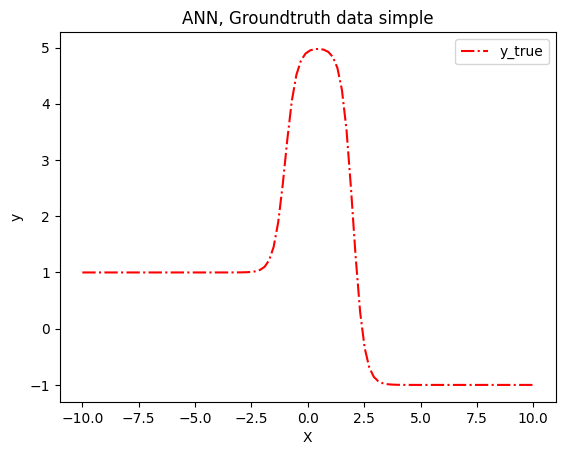

In [24]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
plt.plot(X, y_true, "r-.")
plt.legend(["y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data simple")

print("OK")

#### Qa)

Fit the model using the data generator and the MLP in the next cell.

Then plot `y_true` and `y_pred` in a graph, and extract the network weights and bias coefficients (remember the `coefs_` and `intercepts_` attributes you found on a linear regressor in an earlier exercise, the MLP is similar).

In [25]:
# Create MLP and fit model, just run..

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh',      # activation function
                   hidden_layer_sizes = [2], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)

mlp.fit(X, y_true)
y_pred = mlp.predict(X)

print("OK")

OK


OK


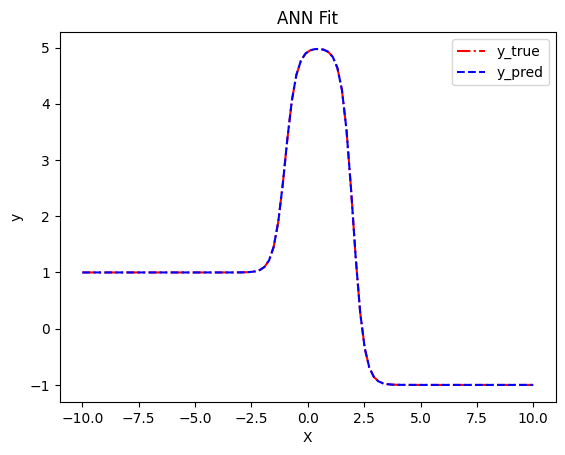

In [26]:
# TODO: plot the fit..
plt.plot(X,y_true,"r-.", label= "y_true")
plt.plot(X, y_pred, "b--", label= "y_pred")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN Fit")

weights = mlp.coefs_
biases = mlp.intercepts_

print ("OK")

#### Qb)

Draw the ANN with its input-, hidden- and output-layer. Remember the bias input to the input- and hidden-layer (a handmade drawing is fine).

Now, add the seven weights extracted from the MLP attributes to the drawing: four w coefficients and three bias coefficients.

In [27]:
# TODO: extract and print all coefficients..

print(f"Model Ceoefficients {weights}")
print(f"Model biases {biases}")

Model Ceoefficients [array([[2.00207668, 1.99915205]]), array([[ 1.99973817],
       [-2.99977205]])]
Model biases [array([ 2.00271347, -3.99836572]), array([2.08098062e-06])]


#### Qc)

Create a mathematical formula for the network ala

    y_math = 0.3* tanh(2 * x + 0.1) - 0.3 * tanh(5 * x + 3) + 0.9

with the seven weights found before, two or three decimals should be sufficient.

In [28]:
# TODO: create formula..
# weights_hidden = mlp.coefs_[0]
# bias_hidden = mlp.intercepts_[0]

# weights_output = mlp.coefs_[1]
# bias_output = mlp.intercepts_[1]
# weights_hidden_reshaped = weights_hidden.T

# neur1_output = np.tanh(np.dot(X,weights_hidden_reshaped[0]) + bias_hidden[0] )
# neur2_output = np.tanh(np.dot(X,weights_hidden_reshaped[1]) + bias_hidden[1] )

# y_math = 0.3 * neur1_output - 0.3* neur2_output + bias_output

# TODO: create formula..
neur1_output = np.tanh(-1.999 * X + 3.999)
neur2_output = np.tanh(-1.999* X - 1.999)
bias3 = 3.92140047e-05
y_math = 0.3 * neur1_output - 0.3* neur2_output + bias3
print("Ok")

Ok


#### Qd)

Plot the `y_math` function using `np.tanh` and `X` as input similar to  

    y_math = 0.3*np.tanh(2 * X + ..
   
and compare `y_math` with `y_pred` and `y_true` in the graph.

Text(0.5, 1.0, 'comparing y_true, u_pred and y_math')

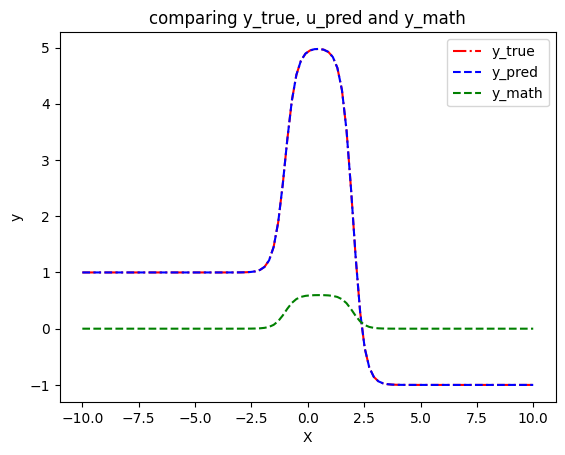

In [29]:
# TODO: plot the formula..
plt.plot(X,y_true,"r-.", label= "y_true")
plt.plot(X, y_pred, "b--", label= "y_pred")
plt.plot(X, y_math, "g--", label= "y_math")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("comparing y_true, u_pred and y_math")


#### Qe)

Plot the first half of the function ala

    y_math_first_part = 0.3* tanh(2 * X + 0.1)
   
and then plot the second part. The sum of these two parts gives the total value of y_math if you also add them with the last bias part.

Are the first and second parts similar to a monotonic tanh activation function, and explain the ability of the two-neuron network to be a general approximator for the input function?

Text(0.5, 1.0, 'comparing first two parts  and y_math')

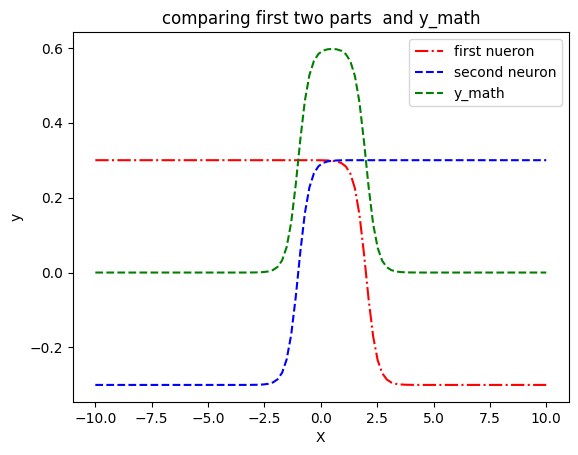

In [30]:
# TODO: plot the first and second half of the formula..

y_math_first_part = 0.3 * neur1_output
y_math_second_part = - 0.3* neur2_output
plt.plot(X,y_math_first_part,"r-.", label= "first nueron")
plt.plot(X, y_math_second_part, "b--", label= "second neuron")
plt.plot(X, y_math, "g--", label= "y_math")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("comparing first two parts  and y_math")

#### Qf)

Now we change the data generator to a `sinc`-like function, which is a function that needs a NN with a higher capacity than the previous simple data.

Extend the MLP with more neurons and more layers, and plot the result. Can you create a good approximation for the `sinc` function?

Text(0, 0.5, 'y')

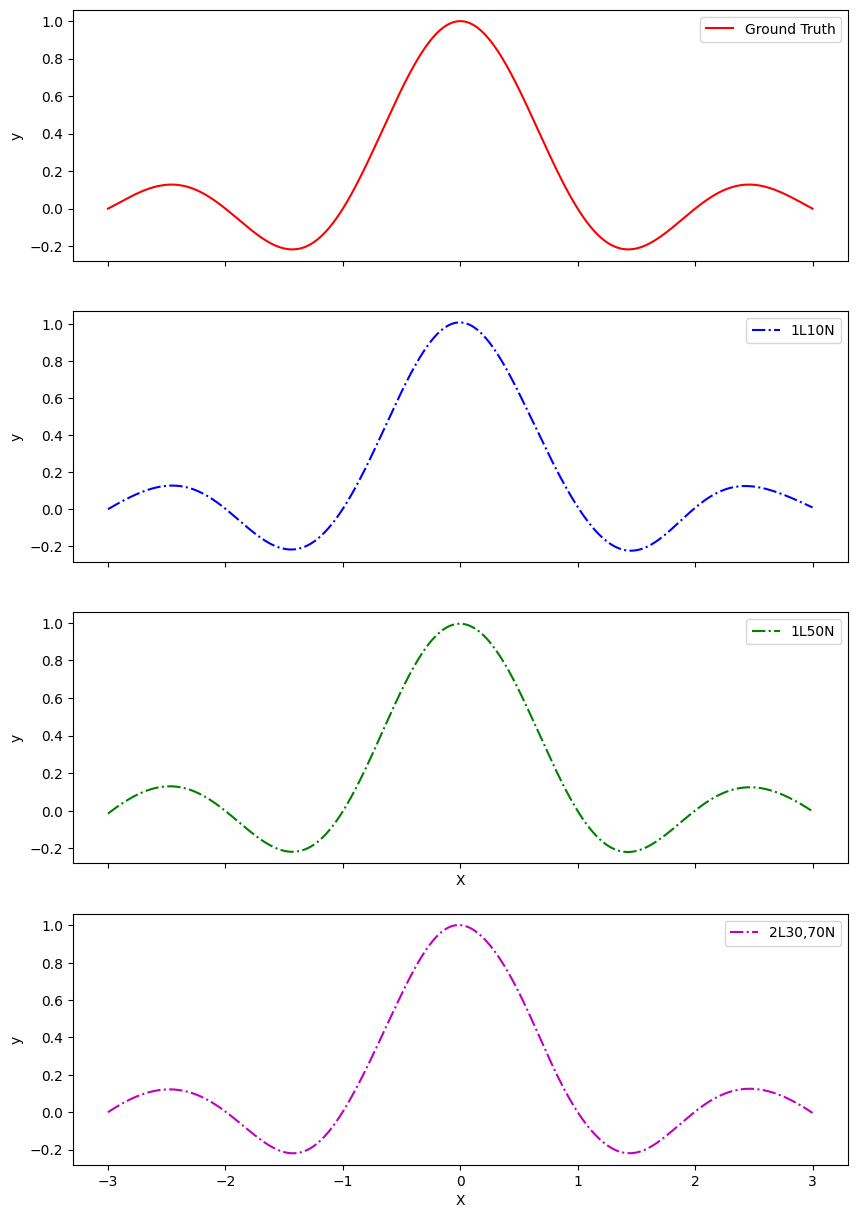

In [49]:
def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-3, 3, 1000)
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()


# TODO:

mlp_sinc = MLPRegressor(activation = 'tanh',      # activation function
                   hidden_layer_sizes = [10], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)


mlp_sinc_50 = MLPRegressor(activation = 'tanh',      # activation function
                   hidden_layer_sizes = [50], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)


mlp_sinc_2_50 = MLPRegressor(activation = 'tanh',      # activation function
                   hidden_layer_sizes =(30,70), # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=1000,
                   verbose = True)

mlp_sinc_50.fit(X, y_true)
mlp_sinc.fit(X, y_true)
mlp_sinc_2_50.fit(X, y_true)
y_pred_50 = mlp_sinc_50.predict(X)
y_pred_sinc = mlp_sinc.predict(X)
y_pred_2_50 = mlp_sinc_2_50.predict(X)

# plt.figure()
# plt.plot(X, y_true, "r-", label= "Ground Truth")
# plt.plot(X, y_pred_sinc, "b--", label= "1L10N")
# plt.plot(X, y_pred_50, "g--", label= "1L50N")
# plt.plot(X, y_pred_2_50, "m-.", label= "2L30,70N")
# plt.legend()
# plt.xlabel("X")
# plt.ylabel("y")
# plt.title("Approxmiation of Sinc-function with MLP")

# Plot the results in subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

# Ground Truth
axs[0].plot(X, y_true, "r-", label="Ground Truth")
axs[0].legend()
axs[0].set_ylabel("y")

# 1L10N
axs[1].plot(X, y_pred_sinc, "b-.", label="1L10N")
axs[1].legend()
axs[1].set_ylabel("y")

# 1L50N
axs[2].plot(X, y_pred_50, "g-.", label="1L50N")
axs[2].legend()
axs[2].set_xlabel("X")
axs[2].set_ylabel("y")


axs[3].plot(X, y_pred_2_50, "m-.", label="2L30,70N")
axs[3].legend()
axs[3].set_xlabel("X")
axs[3].set_ylabel("y")



####  [OPTIONAL] Qg)

Change the hyperparameters in the MLP, say the `alpha` to `1e5` and `1e-1`, and explain the results (hint: regularization).

Also, try out different `activation` functions `learning_rate`s and `solver`s, or other interesting hyperparameters found on the MLP regressor in the documentation.

Finally, implement the MLP regressor in `Keras` instead.

(Solvers aka. optimizers and regularization will be discussed in a later lecture.)

In [32]:
# TODO: do some experiments..

REVISIONS||
:- | :- |
2021-10-04| CEF, initial, converted from old word format.
2021-10-04| CEF, inserted ANN_example.py into Notebook.
2023-03-06| CEF, minor table update.
2023-03-09| CEF, major update, translated to English, elaborated on NNs as Universal Approximator.